In [1]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Read excel file and convert to data frame
excel_file = 'Resources/VacancyRates.xlsx'
VacancyRates = pd.read_excel(excel_file)
VR = pd.DataFrame(VacancyRates)
VR.head()



,MSA,Q105,Q205,Q305,Q405,Q106,Q206,Q306,Q406,Q107,...,Q316,Q416,Q117,Q217,Q317,Q417,Q118,Q218,Q318,Q418
0,"Akron, OH",3.0,1.3,2.6,1.6,1.2,2.8,3.2,5.6,4.3,...,1.2,0.5,1.0,0.0,0.0,1.1,0.5,0.0,NaN,NaN
1,"Albany-Schenectady-Troy, NY",1.6,0.4,2.6,3.5,0.7,0.7,1.8,2.9,2.1,...,0.4,2.2,2.2,1.6,1.8,2.9,1.8,0.4,NaN,NaN
2,"Albuquerque, NM",2.5,2.0,1.5,1.1,0.7,2.2,1.8,3.3,1.8,...,2.4,1.5,1.5,2.2,2.6,2.1,1.9,1.7,NaN,NaN
3,"Allentown-Bethlehem-Easton, PA-NJ",0.0,0.0,1.0,1.3,0.6,0.4,1.3,1.9,1.1,...,2.0,1.8,2.5,1.1,1.6,1.6,0.0,0.0,NaN,NaN
4,"Atlanta-Sandy Springs-Marietta, GA\1",2.9,3.7,3.9,3.1,3.4,3.1,4.5,4.5,3.7,...,1.8,1.5,0.6,0.9,1.2,1.3,1.2,0.9,NaN,NaN


In [3]:
# Restructure the data frame and transpose the data 
VR = pd.melt(VR, id_vars='MSA', value_vars=['Q105', 'Q205', 'Q305', 'Q405', 'Q106', 'Q206', 'Q306', 'Q406', 'Q107', 'Q207', 'Q307', 'Q407', 'Q108', 'Q208', 'Q308',
                                       'Q408', 'Q109', 'Q209', 'Q309', 'Q409', 'Q110', 'Q210', 'Q310', 'Q410', 'Q111', 'Q211', 'Q311', 'Q411', 'Q112', 'Q212', 'Q312',
                                       'Q412', 'Q113', 'Q213', 'Q313', 'Q413', 'Q114', 'Q214', 'Q314', 'Q414', 'Q115', 'Q215', 'Q315', 'Q415', 'Q116', 'Q216', 'Q316', 
                                       'Q416', 'Q117', 'Q217', 'Q317', 'Q417', 'Q118', 'Q218', 'Q318', 'Q418'],
                                        var_name = "Period", value_name = "Rate")

VR.head()
 

,MSA,Period,Rate
0,"Akron, OH",Q105,3.0
1,"Albany-Schenectady-Troy, NY",Q105,1.6
2,"Albuquerque, NM",Q105,2.5
3,"Allentown-Bethlehem-Easton, PA-NJ",Q105,0.0
4,"Atlanta-Sandy Springs-Marietta, GA\1",Q105,2.9


In [13]:
# Add two columns to split and store quarters and years separately
VR['Quarter'] = VR.Period.str[1]

VR['Year'] = pd.to_numeric( "20" + VR.Period.str[2:4])  # Format and change the data type in the year column to integer
VR.head()

,MSA,Period,Rate,Quarter,Year
0,"Akron, OH",Q105,3.0,1,2005
1,"Albany-Schenectady-Troy, NY",Q105,1.6,1,2005
2,"Albuquerque, NM",Q105,2.5,1,2005
3,"Allentown-Bethlehem-Easton, PA-NJ",Q105,0.0,1,2005
4,"Atlanta-Sandy Springs-Marietta, GA\1",Q105,2.9,1,2005


In [6]:

# Group by MSA and year and take the mean of the 4 quarters for each year per MSA
VR_group = VR.groupby(['MSA', 'Year'])['Rate'].mean()
VR_group = VR_group.reset_index()
VR_group.head()




,MSA,Year,Rate
0,"Akron, OH",2005,2.125
1,"Akron, OH",2006,3.200
2,"Akron, OH",2007,4.475
3,"Akron, OH",2008,3.025
4,"Akron, OH",2009,2.925


In [7]:
# Create a pivot table to index rate by year
vacancy = pd.pivot_table(VR_group, values='Rate', index='Year', columns='MSA')

vacancy.head()




MSA,"Akron, OH","Albany-Schenectady-Troy, NY","Albuquerque, NM","Allentown-Bethlehem-Easton, PA-NJ","Atlanta-Sandy Springs-Marietta, GA\1","Austin-Round Rock, TX\2","Bakersfield, CA","Baltimore-Towson, MD\3","Baton Rouge, LA","Birmingham-Hoover, AL\4",...,"Springfield, MA","St. Louis, MO-IL","Syracuse, NY","Tampa-St. Petersburg-Clearwater, FL","Toledo, OH","Tucson, AZ","Tulsa, OK","Virginia Beach-Norfolk-Newport News, VA\35","Washington-Arlington-Alexandria, DC-VA-MD-WV\36","Worcester, MA"
Year,,,,,,,,,,,,,,,,,,,,,
2005,2.125,2.025,1.775,0.575,3.400,2.425,1.45,1.500,2.200,1.600,...,0.425,2.075,1.225,1.825,2.350,1.475,3.375,0.650,1.275,1.400
2006,3.200,1.525,2.000,1.050,3.875,1.550,2.30,2.425,0.925,2.850,...,0.625,2.175,1.825,3.525,2.300,1.925,1.800,1.250,2.150,1.575
2007,4.475,2.125,2.550,1.225,4.725,1.500,1.25,2.750,1.625,2.500,...,1.400,1.750,3.150,5.100,2.375,2.250,3.325,3.350,2.450,0.500
2008,3.025,2.225,1.850,1.300,4.800,2.300,2.90,2.275,0.925,3.350,...,1.825,3.075,2.350,3.000,2.125,1.800,2.900,3.225,2.700,1.275
2009,2.925,2.375,1.950,1.950,4.075,1.625,3.45,1.950,2.925,2.125,...,1.300,1.800,0.800,4.125,3.075,2.675,2.425,2.300,2.275,1.775


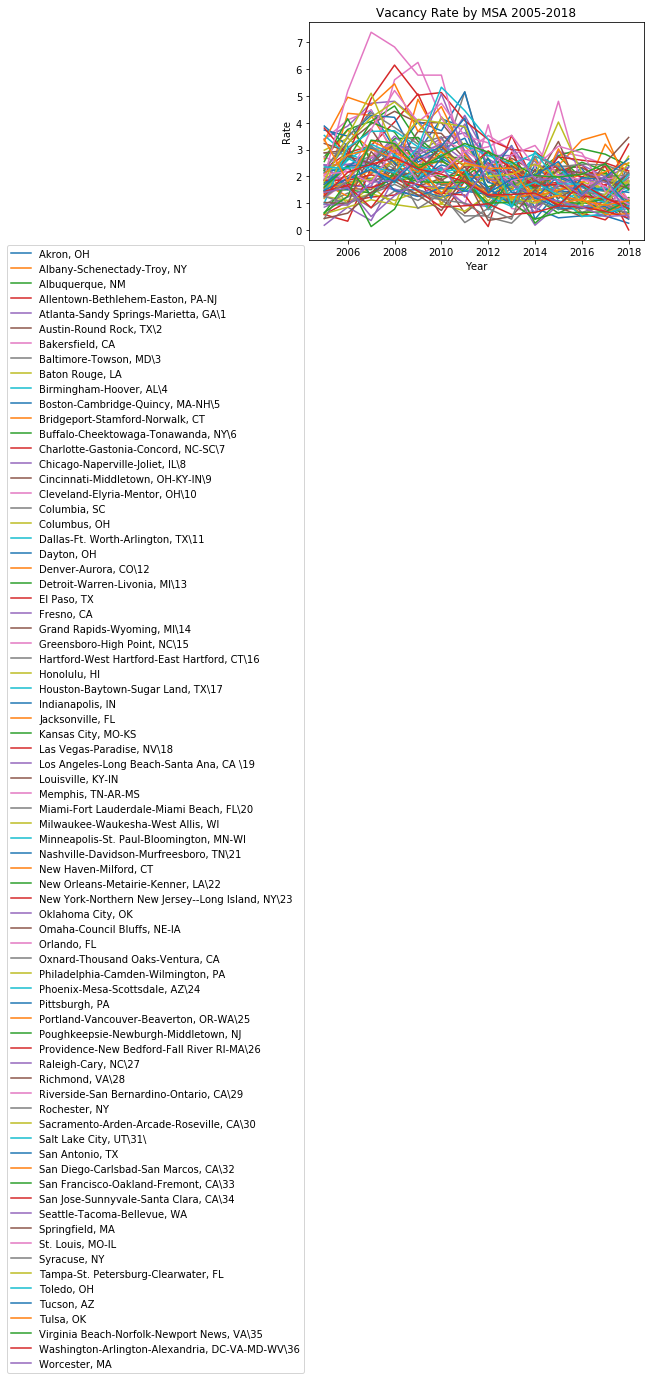

In [8]:
# plot line chart based on hte pivot table

ax = vacancy.plot(kind = 'line')
plt.title("Vacancy Rate by MSA 2005-2018")
ax.set_ylabel("Rate")
plt.legend(bbox_to_anchor = (0, 0))
plt.show()



Akron, OH 


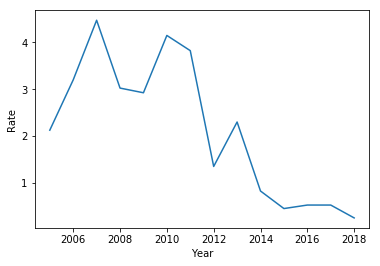

--------------------
Albany-Schenectady-Troy, NY 


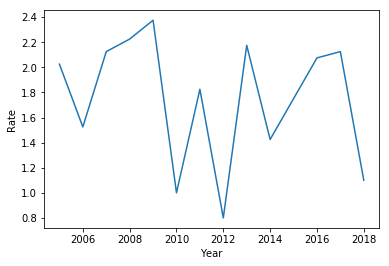

--------------------
Albuquerque, NM


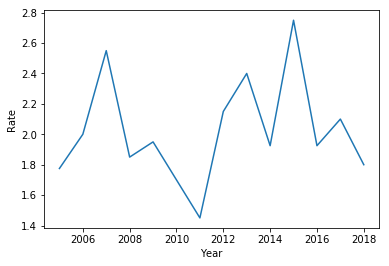

--------------------
Allentown-Bethlehem-Easton, PA-NJ


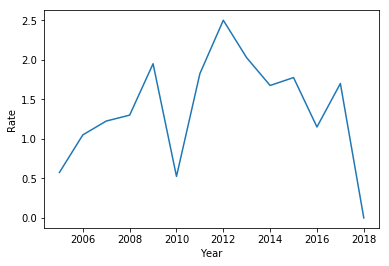

--------------------
Atlanta-Sandy Springs-Marietta, GA\1


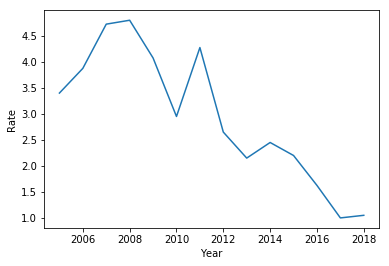

--------------------
Austin-Round Rock, TX\2


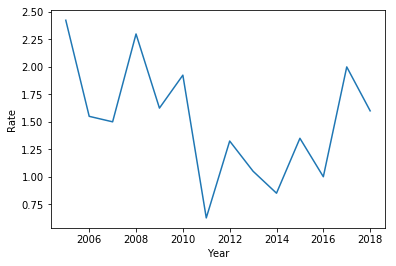

--------------------
Bakersfield, CA


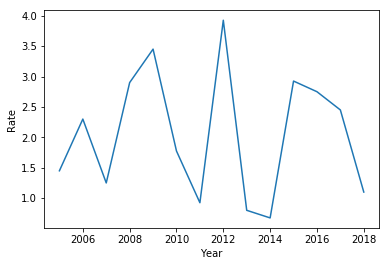

--------------------
Baltimore-Towson, MD\3


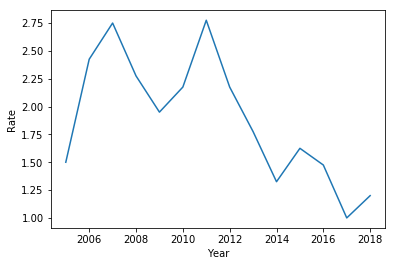

--------------------
Baton Rouge, LA


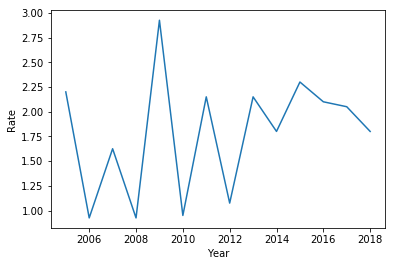

--------------------
Birmingham-Hoover, AL\4


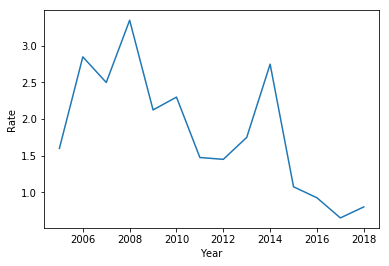

--------------------
Boston-Cambridge-Quincy, MA-NH\5


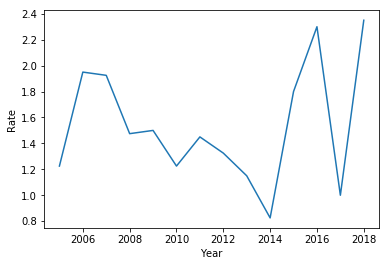

--------------------
Bridgeport-Stamford-Norwalk, CT


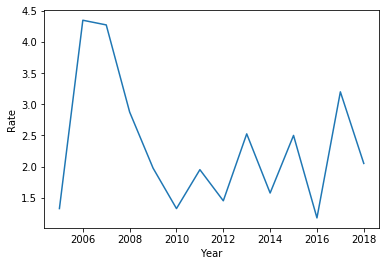

--------------------
Buffalo-Cheektowaga-Tonawanda, NY\6


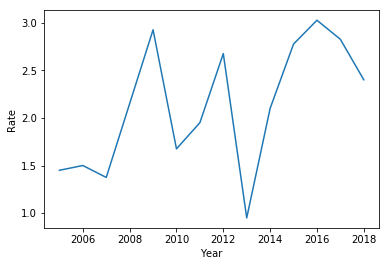

--------------------
Charlotte-Gastonia-Concord, NC-SC\7


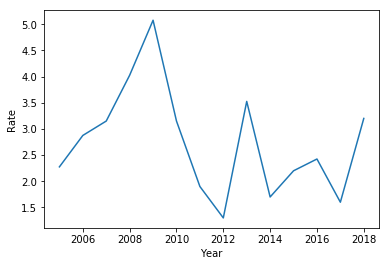

--------------------
Chicago-Naperville-Joliet, IL\8


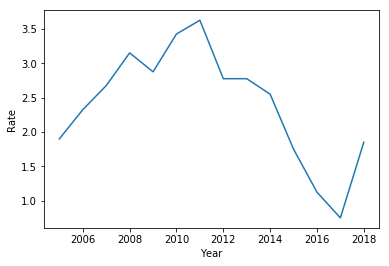

--------------------
Cincinnati-Middletown, OH-KY-IN\9


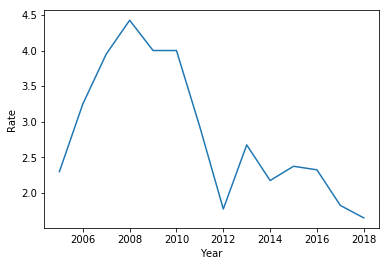

--------------------
Cleveland-Elyria-Mentor, OH\10


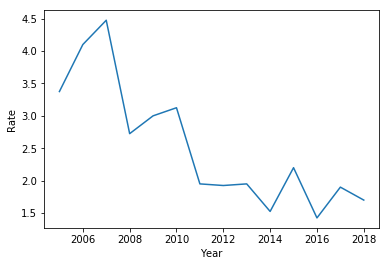

--------------------
Columbia, SC


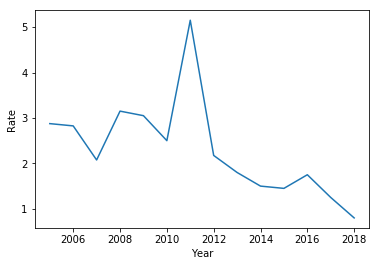

--------------------
Columbus, OH


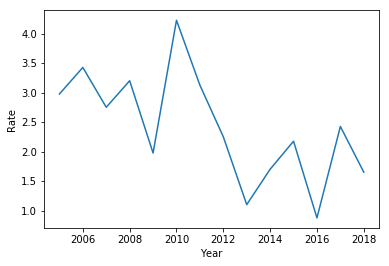

--------------------
Dallas-Ft. Worth-Arlington, TX\11


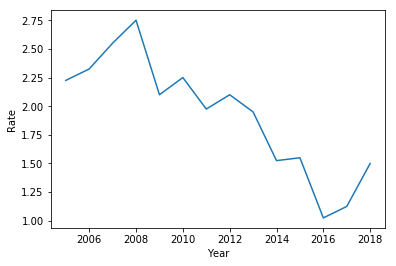

--------------------
Dayton, OH


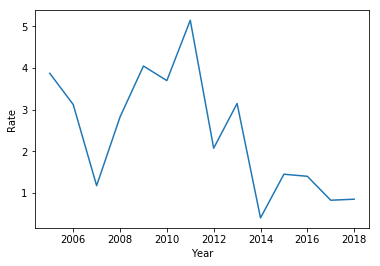

--------------------
Denver-Aurora, CO\12


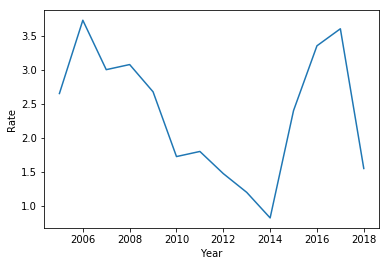

--------------------
Detroit-Warren-Livonia, MI\13


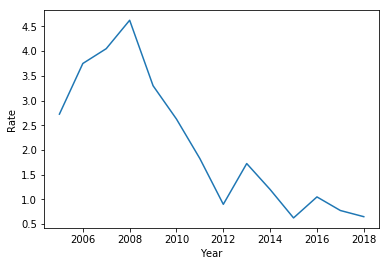

--------------------
El Paso, TX


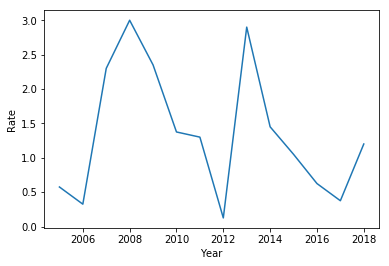

--------------------
Fresno, CA


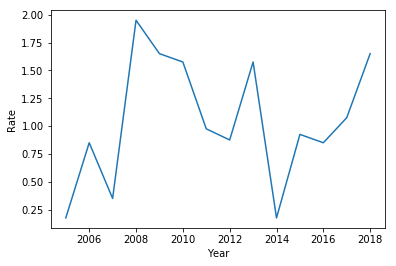

--------------------
Grand Rapids-Wyoming, MI\14


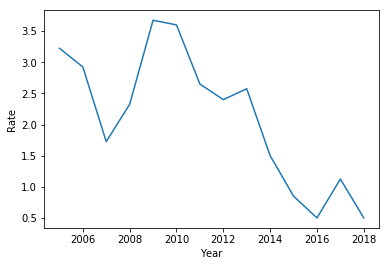

--------------------
Greensboro-High Point, NC\15


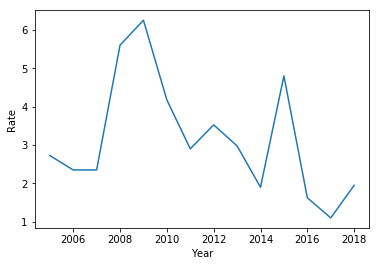

--------------------
Hartford-West Hartford-East Hartford, CT\16


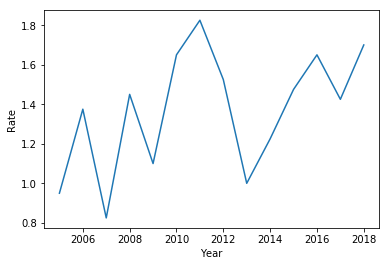

--------------------
Honolulu, HI


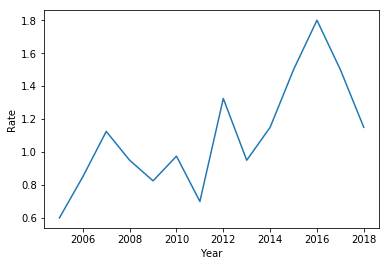

--------------------
Houston-Baytown-Sugar Land, TX\17


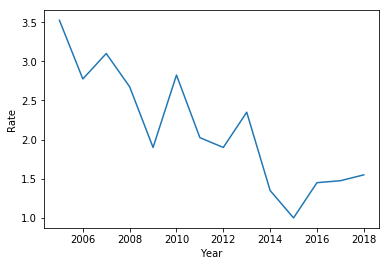

--------------------
Indianapolis, IN


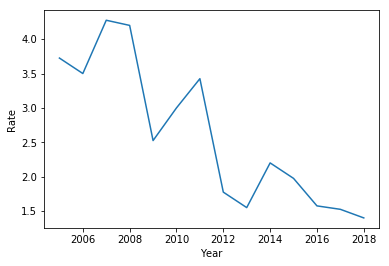

--------------------
Jacksonville, FL


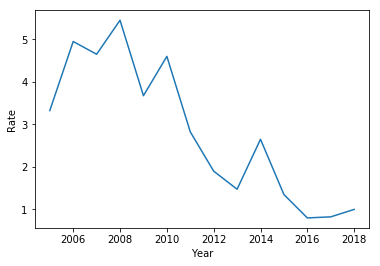

--------------------
Kansas City, MO-KS


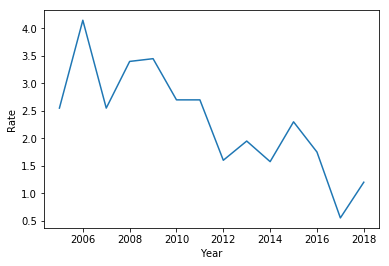

--------------------
Las Vegas-Paradise, NV\18


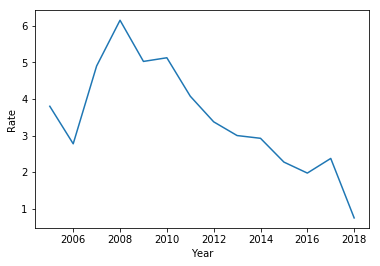

--------------------
Los Angeles-Long Beach-Santa Ana, CA \19


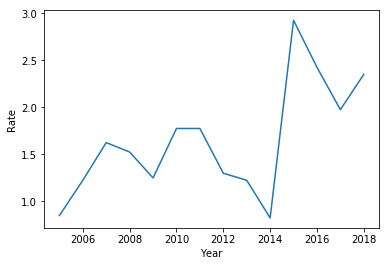

--------------------
Louisville, KY-IN


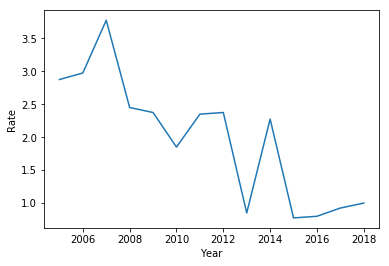

--------------------
Memphis, TN-AR-MS


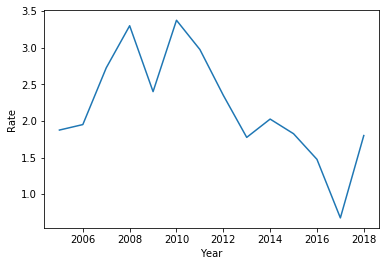

--------------------
Miami-Fort Lauderdale-Miami Beach, FL\20


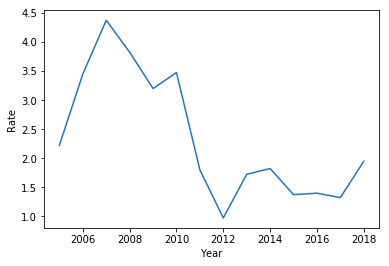

--------------------
Milwaukee-Waukesha-West Allis, WI


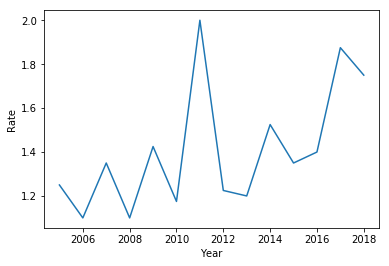

--------------------
Minneapolis-St. Paul-Bloomington, MN-WI 


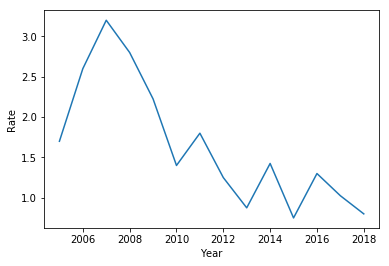

--------------------
Nashville-Davidson-Murfreesboro, TN\21


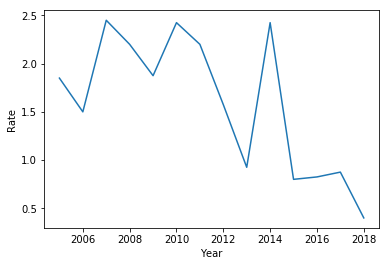

--------------------
New Haven-Milford, CT


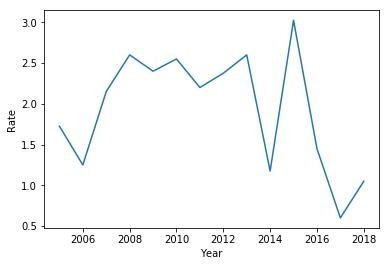

--------------------
New Orleans-Metairie-Kenner, LA\22


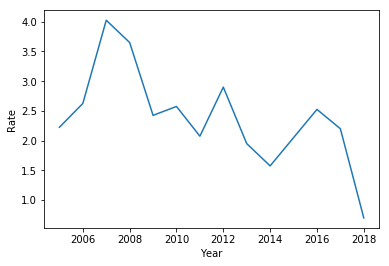

--------------------
New York-Northern New Jersey--Long Island, NY\23


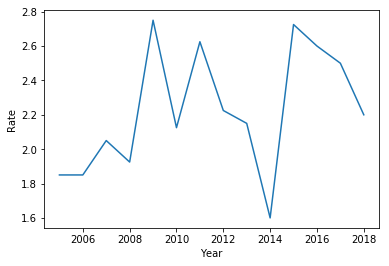

--------------------
Oklahoma City, OK


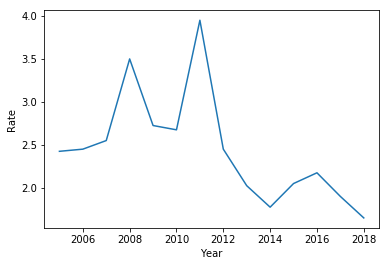

--------------------
Omaha-Council Bluffs, NE-IA


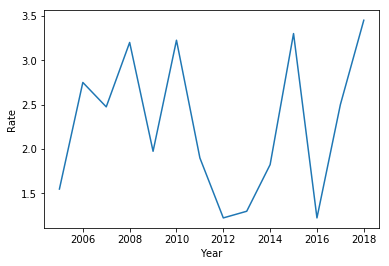

--------------------
Orlando, FL


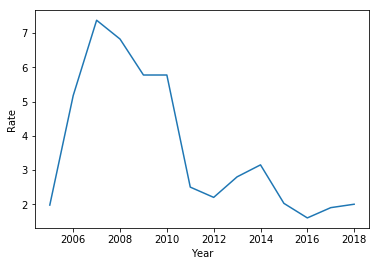

--------------------
Oxnard-Thousand Oaks-Ventura, CA


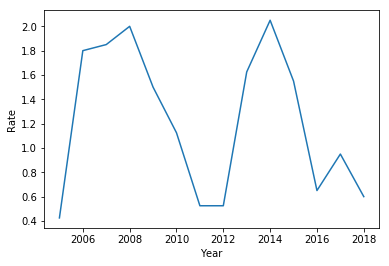

--------------------
Philadelphia-Camden-Wilmington, PA


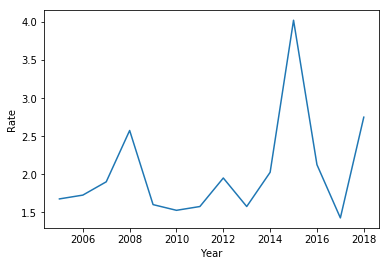

--------------------
Phoenix-Mesa-Scottsdale, AZ\24


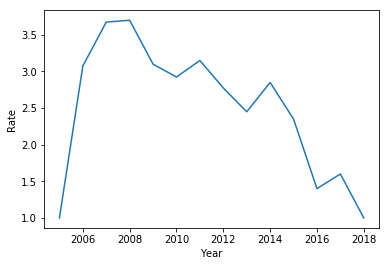

--------------------
Pittsburgh, PA


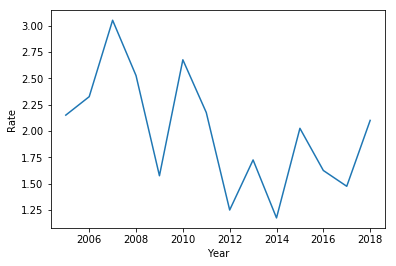

--------------------
Portland-Vancouver-Beaverton, OR-WA\25


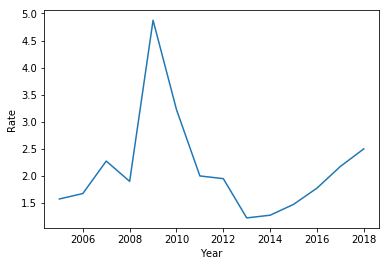

--------------------
Poughkeepsie-Newburgh-Middletown, NJ


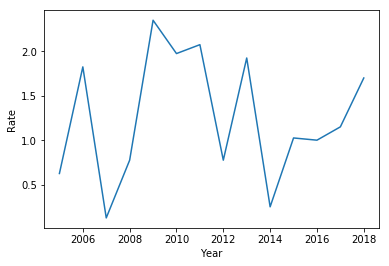

--------------------
Providence-New Bedford-Fall River RI-MA\26


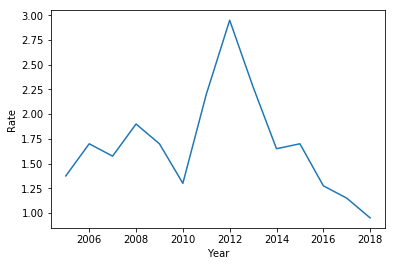

--------------------
Raleigh-Cary, NC\27


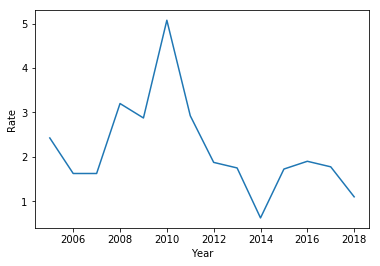

--------------------
Richmond, VA\28


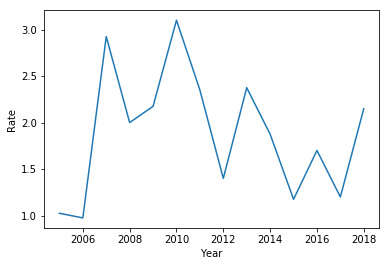

--------------------
Riverside-San Bernardino-Ontario, CA\29


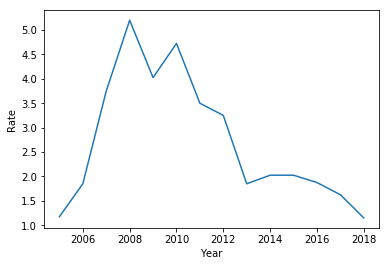

--------------------
Rochester, NY


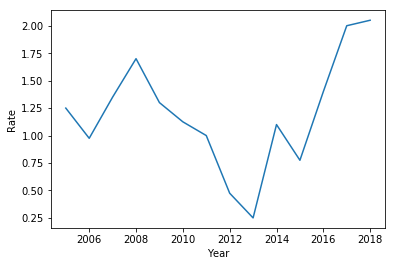

--------------------
Sacramento-Arden-Arcade-Roseville, CA\30


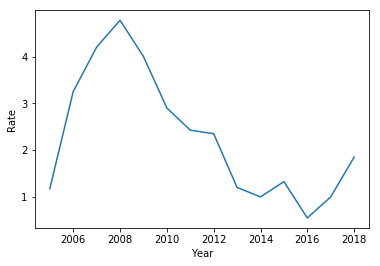

--------------------
Salt Lake City, UT\31\


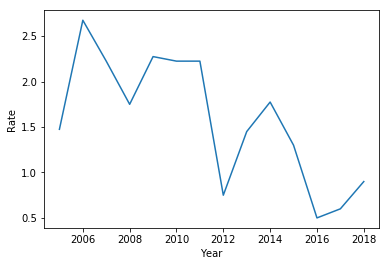

--------------------
San Antonio, TX


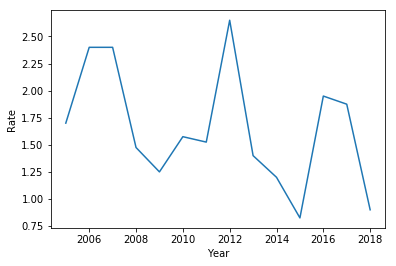

--------------------
San Diego-Carlsbad-San Marcos, CA\32


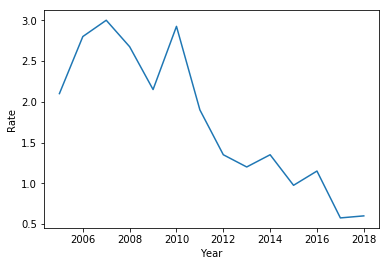

--------------------
San Francisco-Oakland-Fremont, CA\33


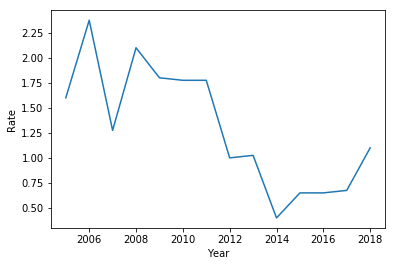

--------------------
San Jose-Sunnyvale-Santa Clara, CA\34


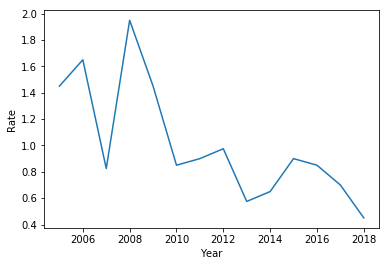

--------------------
Seattle-Tacoma-Bellevue, WA


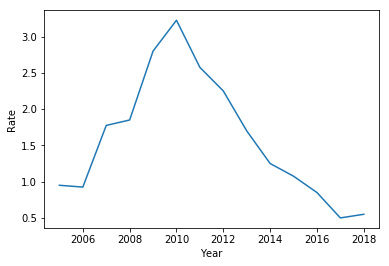

--------------------
Springfield, MA


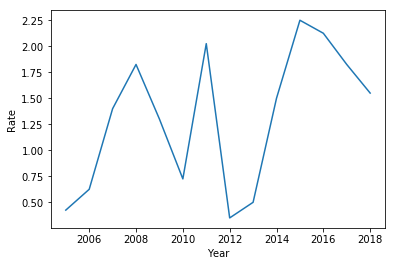

--------------------
St. Louis, MO-IL


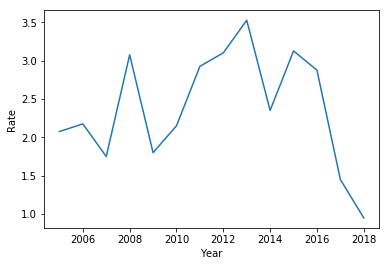

--------------------
Syracuse, NY


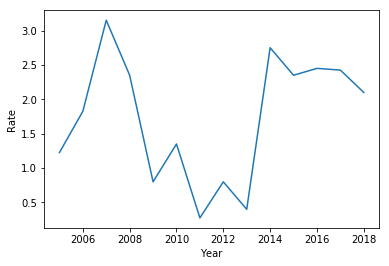

--------------------
Tampa-St. Petersburg-Clearwater, FL


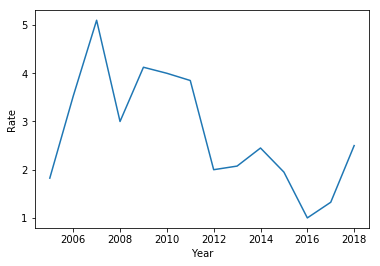

--------------------
Toledo, OH


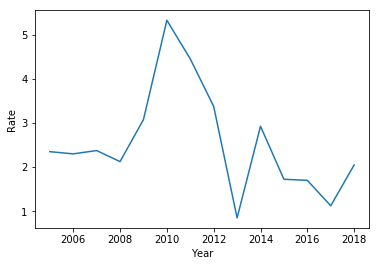

--------------------
Tucson, AZ


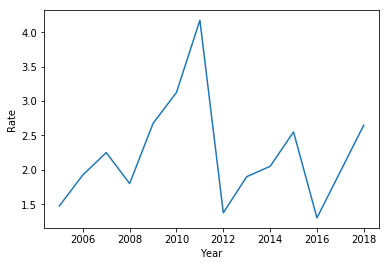

--------------------
Tulsa, OK


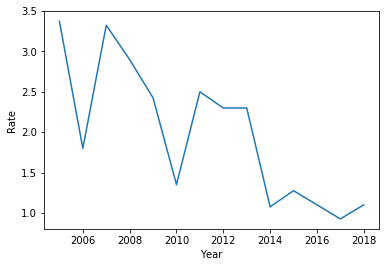

--------------------
Virginia Beach-Norfolk-Newport News, VA\35


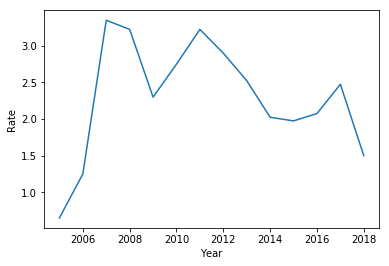

--------------------
Washington-Arlington-Alexandria, DC-VA-MD-WV\36


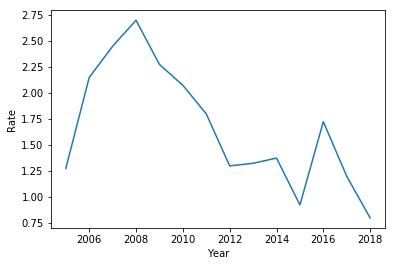

--------------------
Worcester, MA


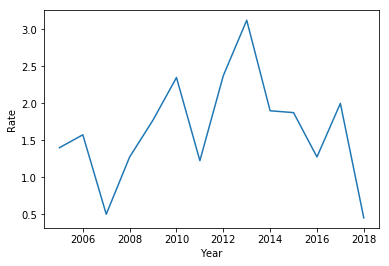

--------------------


In [14]:
# Plot line charts for each MSA
for MSA in vacancy.columns.tolist():
    print(MSA)
    MSA_Df = vacancy[MSA]
    ax = MSA_Df.plot(kind='line')
    ax.set_ylabel("Rate")
    plt.show()
    print('--------------------')
    


In [10]:
# Year over year percentage change analysis for the vacancy rate
vacancy_change = vacancy.pct_change()

for i in range(2006,2018):
    print(i)
    percentage_change = vacancy_change.loc[i]
    print(percentage_change)


2006
MSA
Akron, OH                                          0.505882
Albany-Schenectady-Troy, NY                       -0.246914
Albuquerque, NM                                    0.126761
Allentown-Bethlehem-Easton, PA-NJ                  0.826087
Atlanta-Sandy Springs-Marietta, GA\1               0.139706
Austin-Round Rock, TX\2                           -0.360825
Bakersfield, CA                                    0.586207
Baltimore-Towson, MD\3                             0.616667
Baton Rouge, LA                                   -0.579545
Birmingham-Hoover, AL\4                            0.781250
Boston-Cambridge-Quincy, MA-NH\5                   0.591837
Bridgeport-Stamford-Norwalk, CT                    2.283019
Buffalo-Cheektowaga-Tonawanda, NY\6                0.034483
Charlotte-Gastonia-Concord, NC-SC\7                0.263736
Chicago-Naperville-Joliet, IL\8                    0.223684
Cincinnati-Middletown, OH-KY-IN\9                  0.413043
Cleveland-Elyria-Mentor, OH\10 

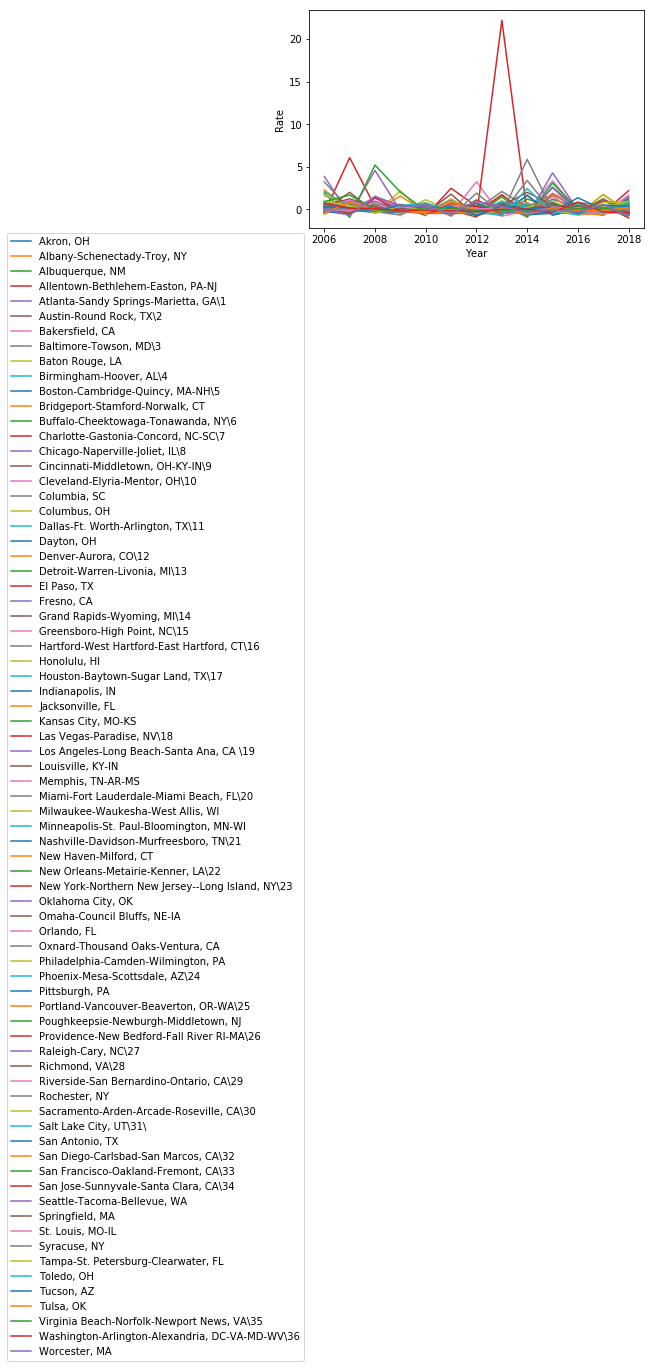

In [15]:
# Plot vacancy percentage change YoY for all cities from 2006 to 2018
ax = vacancy_change.plot(kind = 'line')
plt.legend(bbox_to_anchor=(0, 0))
ax.set_ylabel("Rate")
plt.show()

Akron, OH 


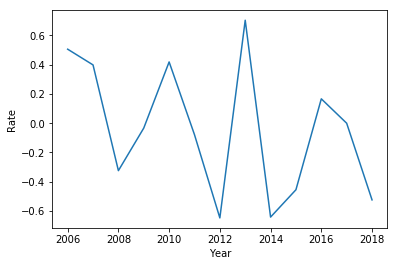

--------------
Albany-Schenectady-Troy, NY 


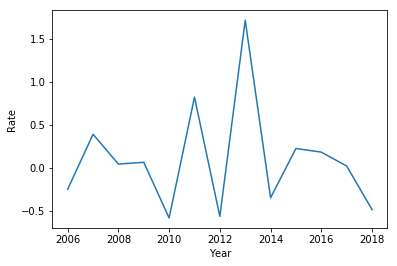

--------------
Albuquerque, NM


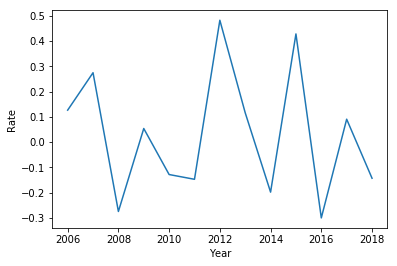

--------------
Allentown-Bethlehem-Easton, PA-NJ


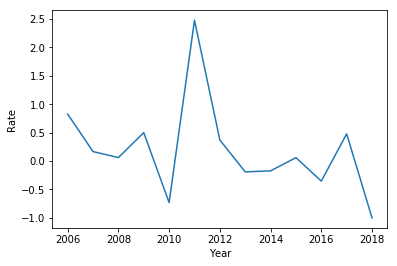

--------------
Atlanta-Sandy Springs-Marietta, GA\1


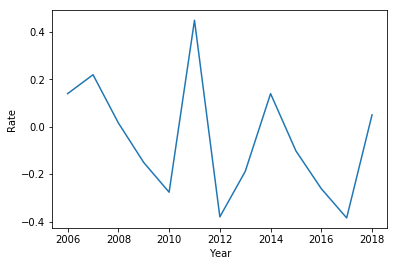

--------------
Austin-Round Rock, TX\2


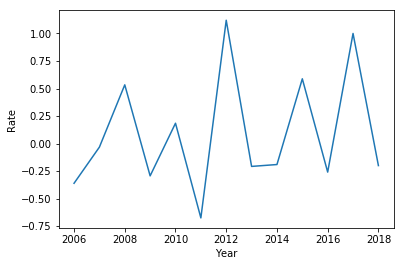

--------------
Bakersfield, CA


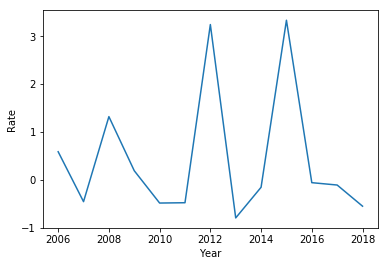

--------------
Baltimore-Towson, MD\3


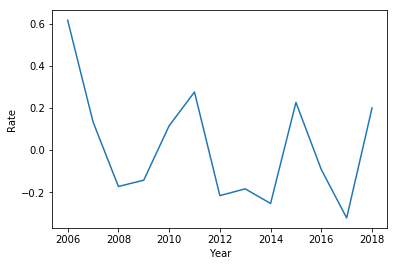

--------------
Baton Rouge, LA


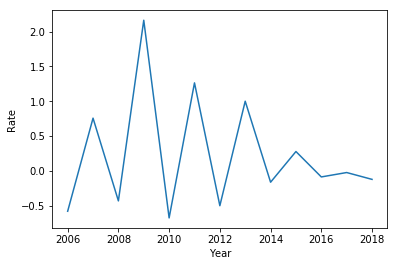

--------------
Birmingham-Hoover, AL\4


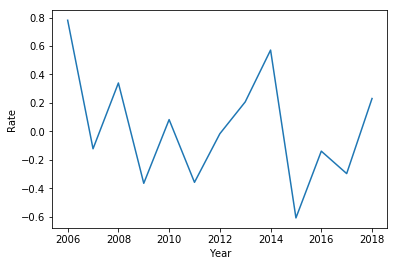

--------------
Boston-Cambridge-Quincy, MA-NH\5


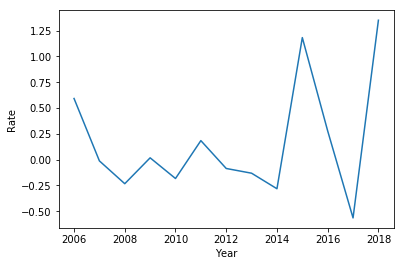

--------------
Bridgeport-Stamford-Norwalk, CT


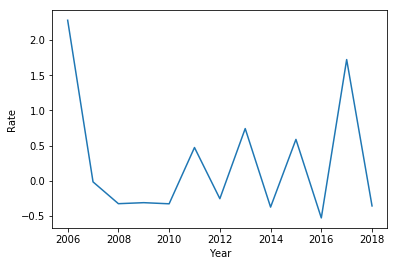

--------------
Buffalo-Cheektowaga-Tonawanda, NY\6


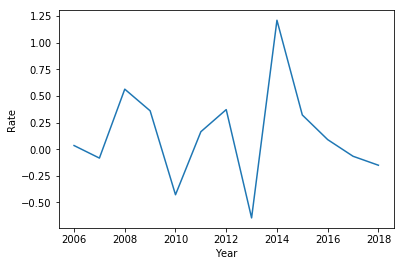

--------------
Charlotte-Gastonia-Concord, NC-SC\7


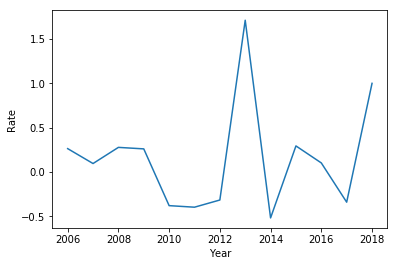

--------------
Chicago-Naperville-Joliet, IL\8


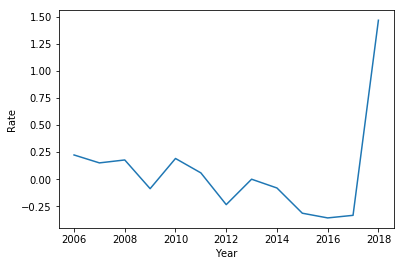

--------------
Cincinnati-Middletown, OH-KY-IN\9


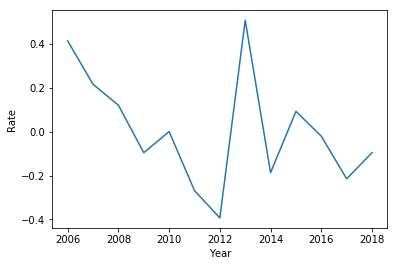

--------------
Cleveland-Elyria-Mentor, OH\10


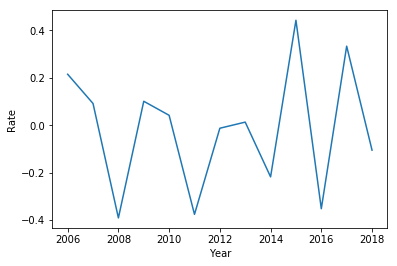

--------------
Columbia, SC


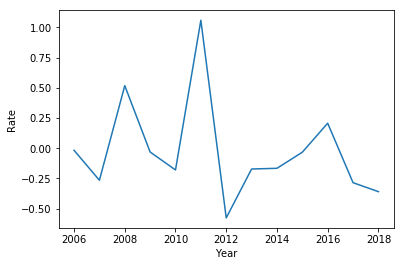

--------------
Columbus, OH


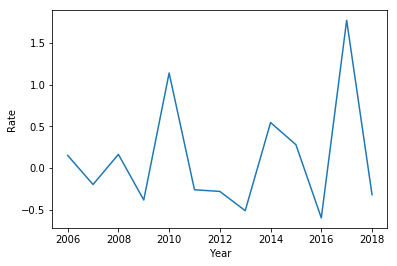

--------------
Dallas-Ft. Worth-Arlington, TX\11


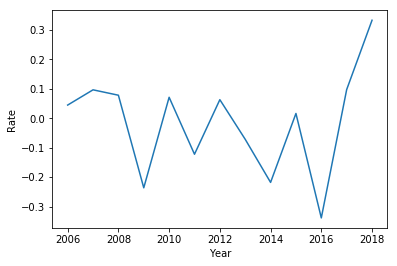

--------------
Dayton, OH


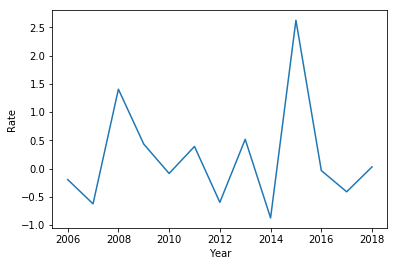

--------------
Denver-Aurora, CO\12


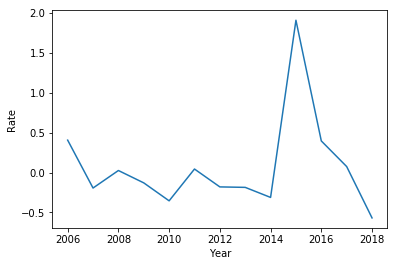

--------------
Detroit-Warren-Livonia, MI\13


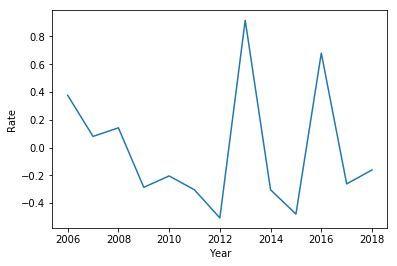

--------------
El Paso, TX


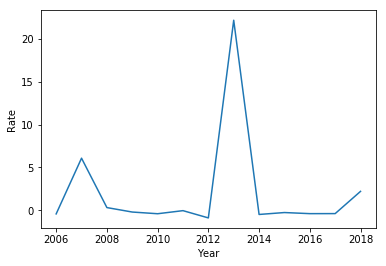

--------------
Fresno, CA


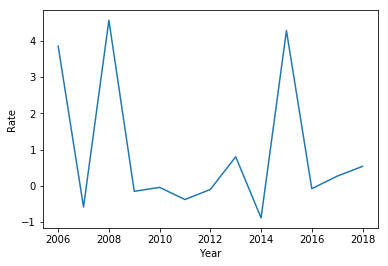

--------------
Grand Rapids-Wyoming, MI\14


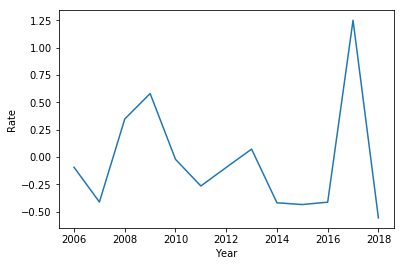

--------------
Greensboro-High Point, NC\15


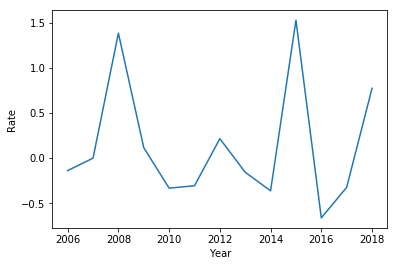

--------------
Hartford-West Hartford-East Hartford, CT\16


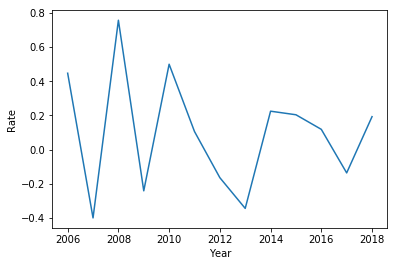

--------------
Honolulu, HI


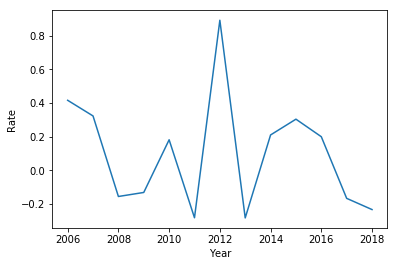

--------------
Houston-Baytown-Sugar Land, TX\17


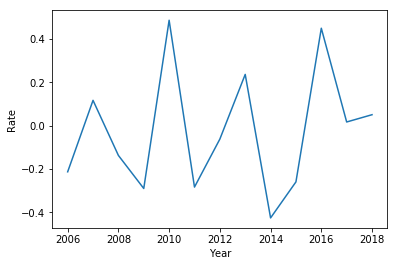

--------------
Indianapolis, IN


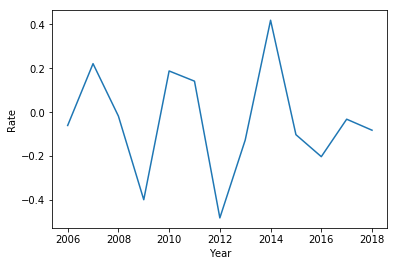

--------------
Jacksonville, FL


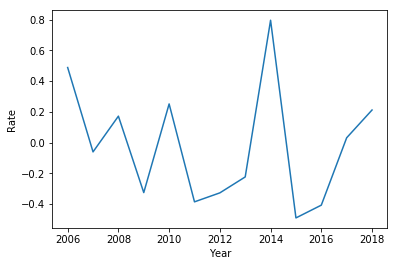

--------------
Kansas City, MO-KS


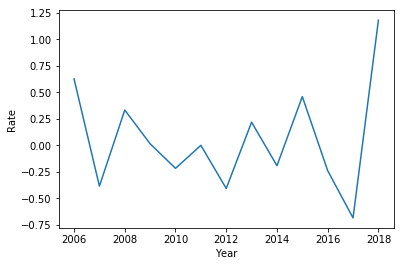

--------------
Las Vegas-Paradise, NV\18


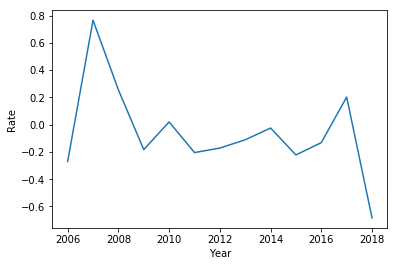

--------------
Los Angeles-Long Beach-Santa Ana, CA \19


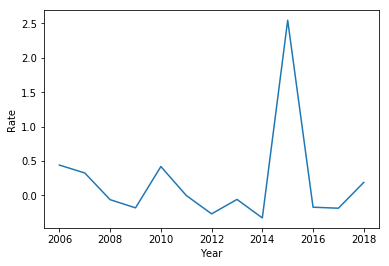

--------------
Louisville, KY-IN


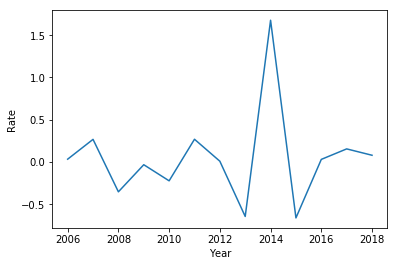

--------------
Memphis, TN-AR-MS


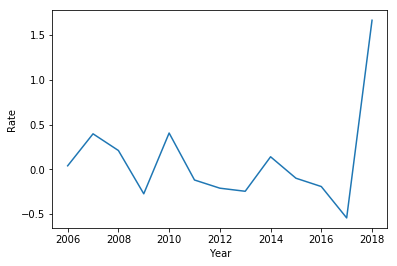

--------------
Miami-Fort Lauderdale-Miami Beach, FL\20


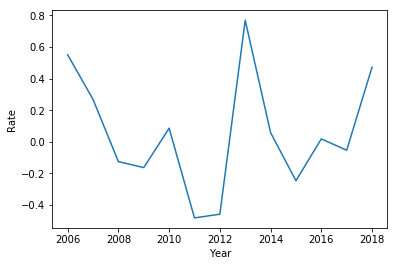

--------------
Milwaukee-Waukesha-West Allis, WI


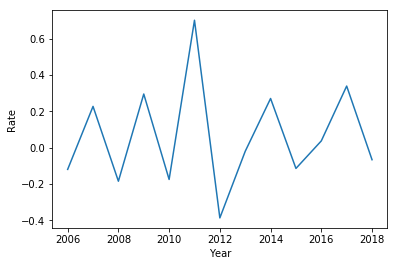

--------------
Minneapolis-St. Paul-Bloomington, MN-WI 


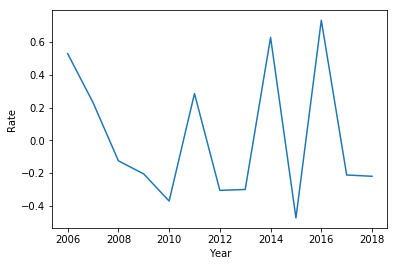

--------------
Nashville-Davidson-Murfreesboro, TN\21


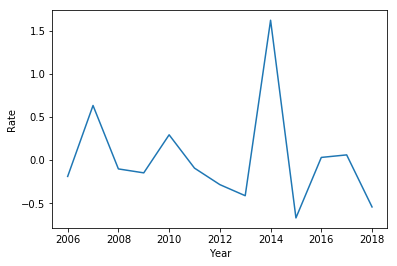

--------------
New Haven-Milford, CT


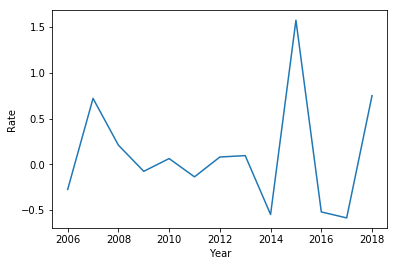

--------------
New Orleans-Metairie-Kenner, LA\22


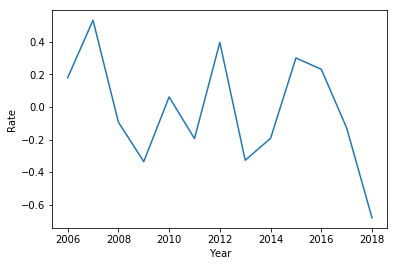

--------------
New York-Northern New Jersey--Long Island, NY\23


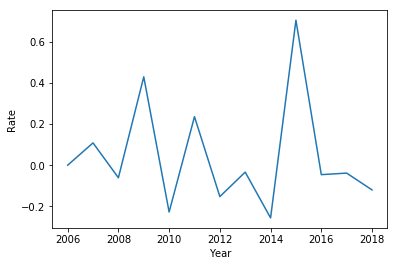

--------------
Oklahoma City, OK


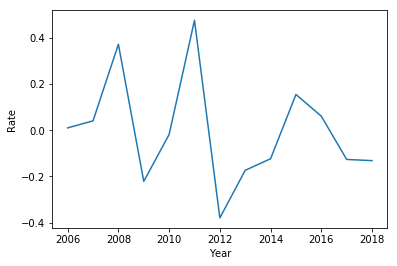

--------------
Omaha-Council Bluffs, NE-IA


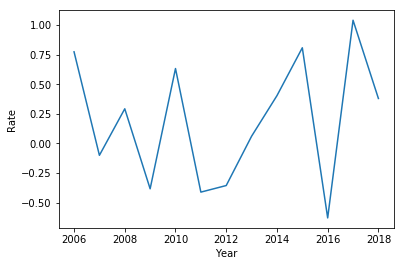

--------------
Orlando, FL


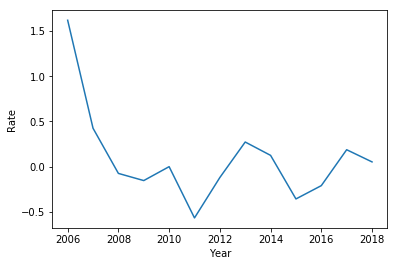

--------------
Oxnard-Thousand Oaks-Ventura, CA


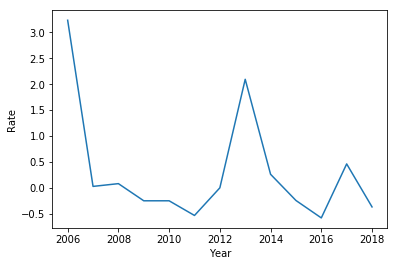

--------------
Philadelphia-Camden-Wilmington, PA


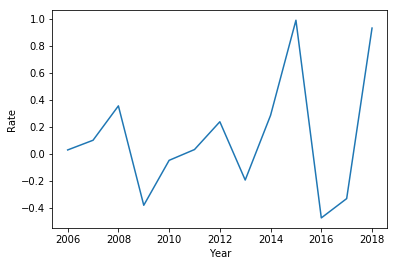

--------------
Phoenix-Mesa-Scottsdale, AZ\24


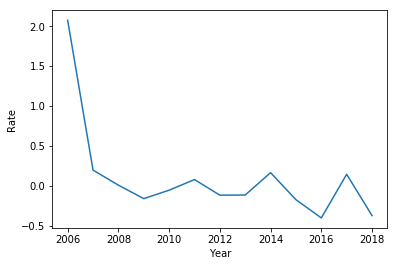

--------------
Pittsburgh, PA


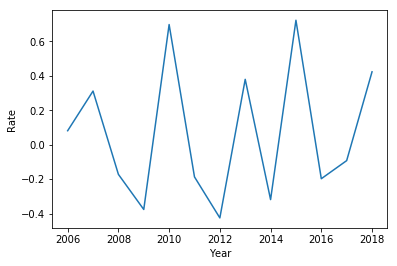

--------------
Portland-Vancouver-Beaverton, OR-WA\25


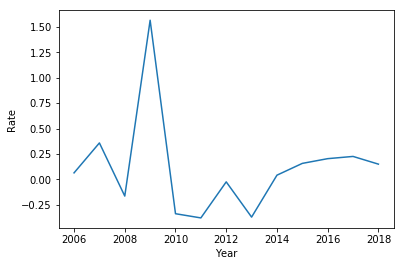

--------------
Poughkeepsie-Newburgh-Middletown, NJ


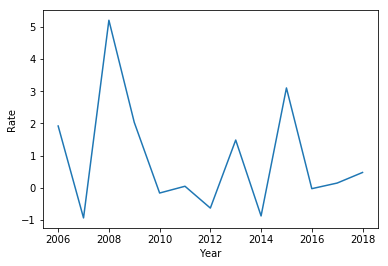

--------------
Providence-New Bedford-Fall River RI-MA\26


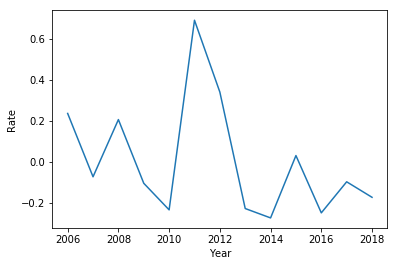

--------------
Raleigh-Cary, NC\27


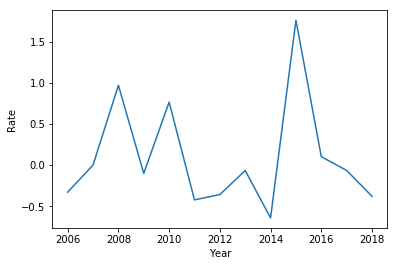

--------------
Richmond, VA\28


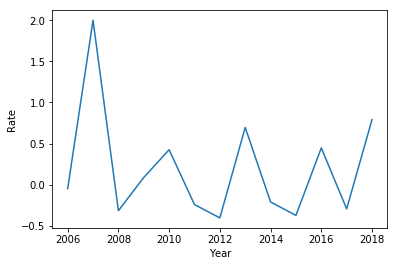

--------------
Riverside-San Bernardino-Ontario, CA\29


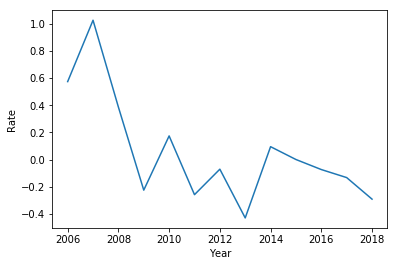

--------------
Rochester, NY


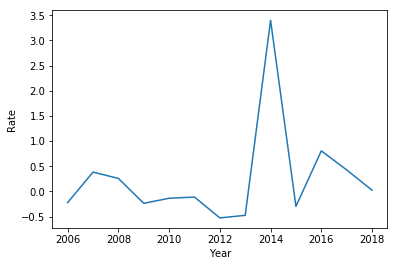

--------------
Sacramento-Arden-Arcade-Roseville, CA\30


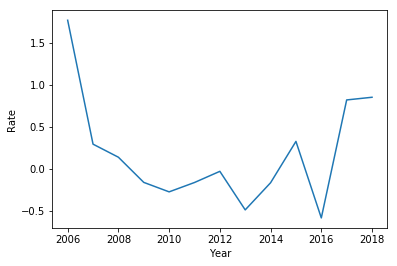

--------------
Salt Lake City, UT\31\


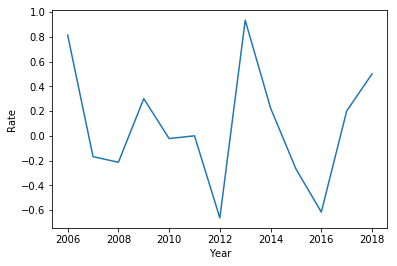

--------------
San Antonio, TX


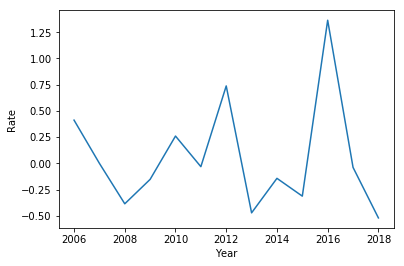

--------------
San Diego-Carlsbad-San Marcos, CA\32


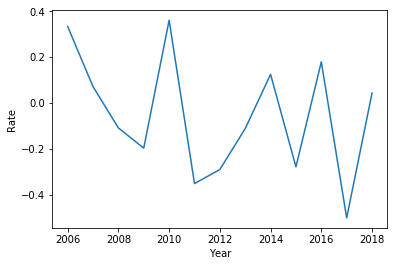

--------------
San Francisco-Oakland-Fremont, CA\33


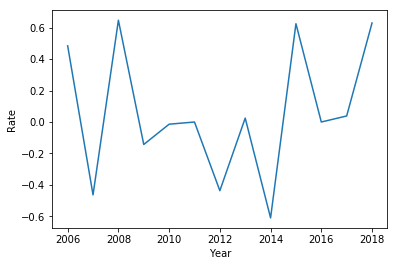

--------------
San Jose-Sunnyvale-Santa Clara, CA\34


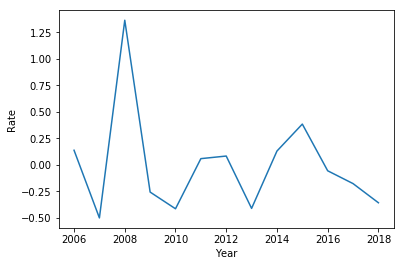

--------------
Seattle-Tacoma-Bellevue, WA


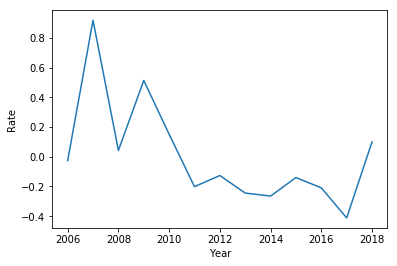

--------------
Springfield, MA


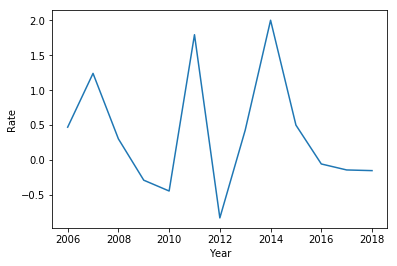

--------------
St. Louis, MO-IL


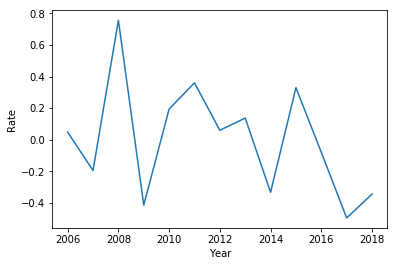

--------------
Syracuse, NY


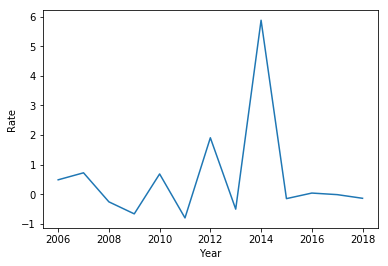

--------------
Tampa-St. Petersburg-Clearwater, FL


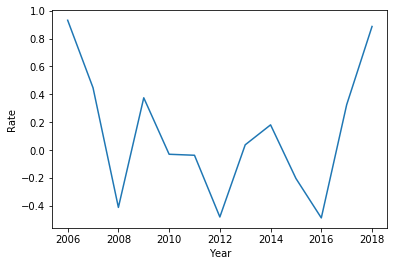

--------------
Toledo, OH


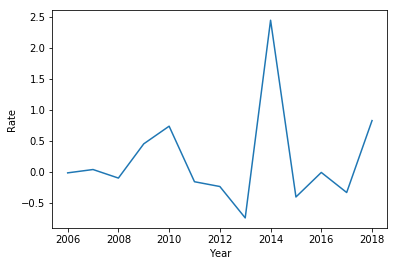

--------------
Tucson, AZ


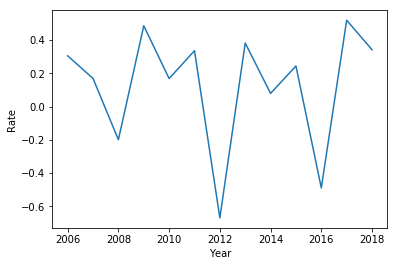

--------------
Tulsa, OK


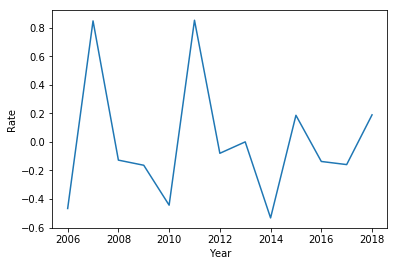

--------------
Virginia Beach-Norfolk-Newport News, VA\35


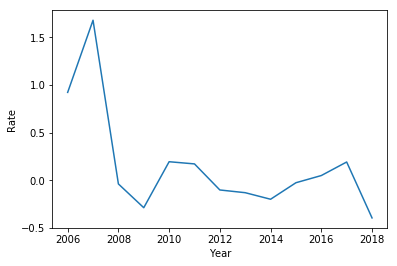

--------------
Washington-Arlington-Alexandria, DC-VA-MD-WV\36


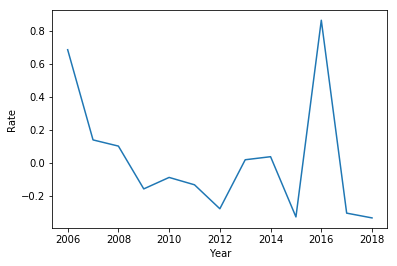

--------------
Worcester, MA


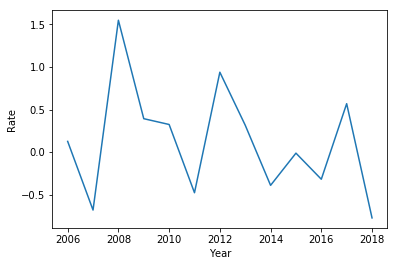

--------------


In [16]:
# Plot vacancy percentage change for each MSA from 2006 to 2018


for MSA in vacancy_change.columns.tolist():
    print(MSA)
    MSA_percentage = vacancy_change[MSA]
    ax = MSA_percentage.plot(kind='line')
    ax.set_ylabel("Rate")
    plt.show()
    print('--------------')